In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import mean_absolute_percentage_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
file_link = 'https://drive.google.com/file/d/11d9_YDGBFixQoYu8bzcPeOsQ-0LSwSyw/view?usp=sharing'

id = file_link.split("/")[-2]

new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

df.head(5)

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


# **Initial Dtaset Analysis**

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [ ]:
df.describe(include='all')

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,52704,52704,52704.000000,9648.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
unique,8784,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2024-12-31 07:00:00+00:00,Brasilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,258.258121,462.348259,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339
std,NaN,NaN,159.589953,33.769009,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,NaN,NaN,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,NaN,NaN,159.000000,445.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,NaN,NaN,213.000000,453.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835
75%,NaN,NaN,306.000000,467.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089


In [ ]:
df.isnull().sum()

,0
Date,0
City,0
CO,0
CO2,43056
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


## **Data Visulization**

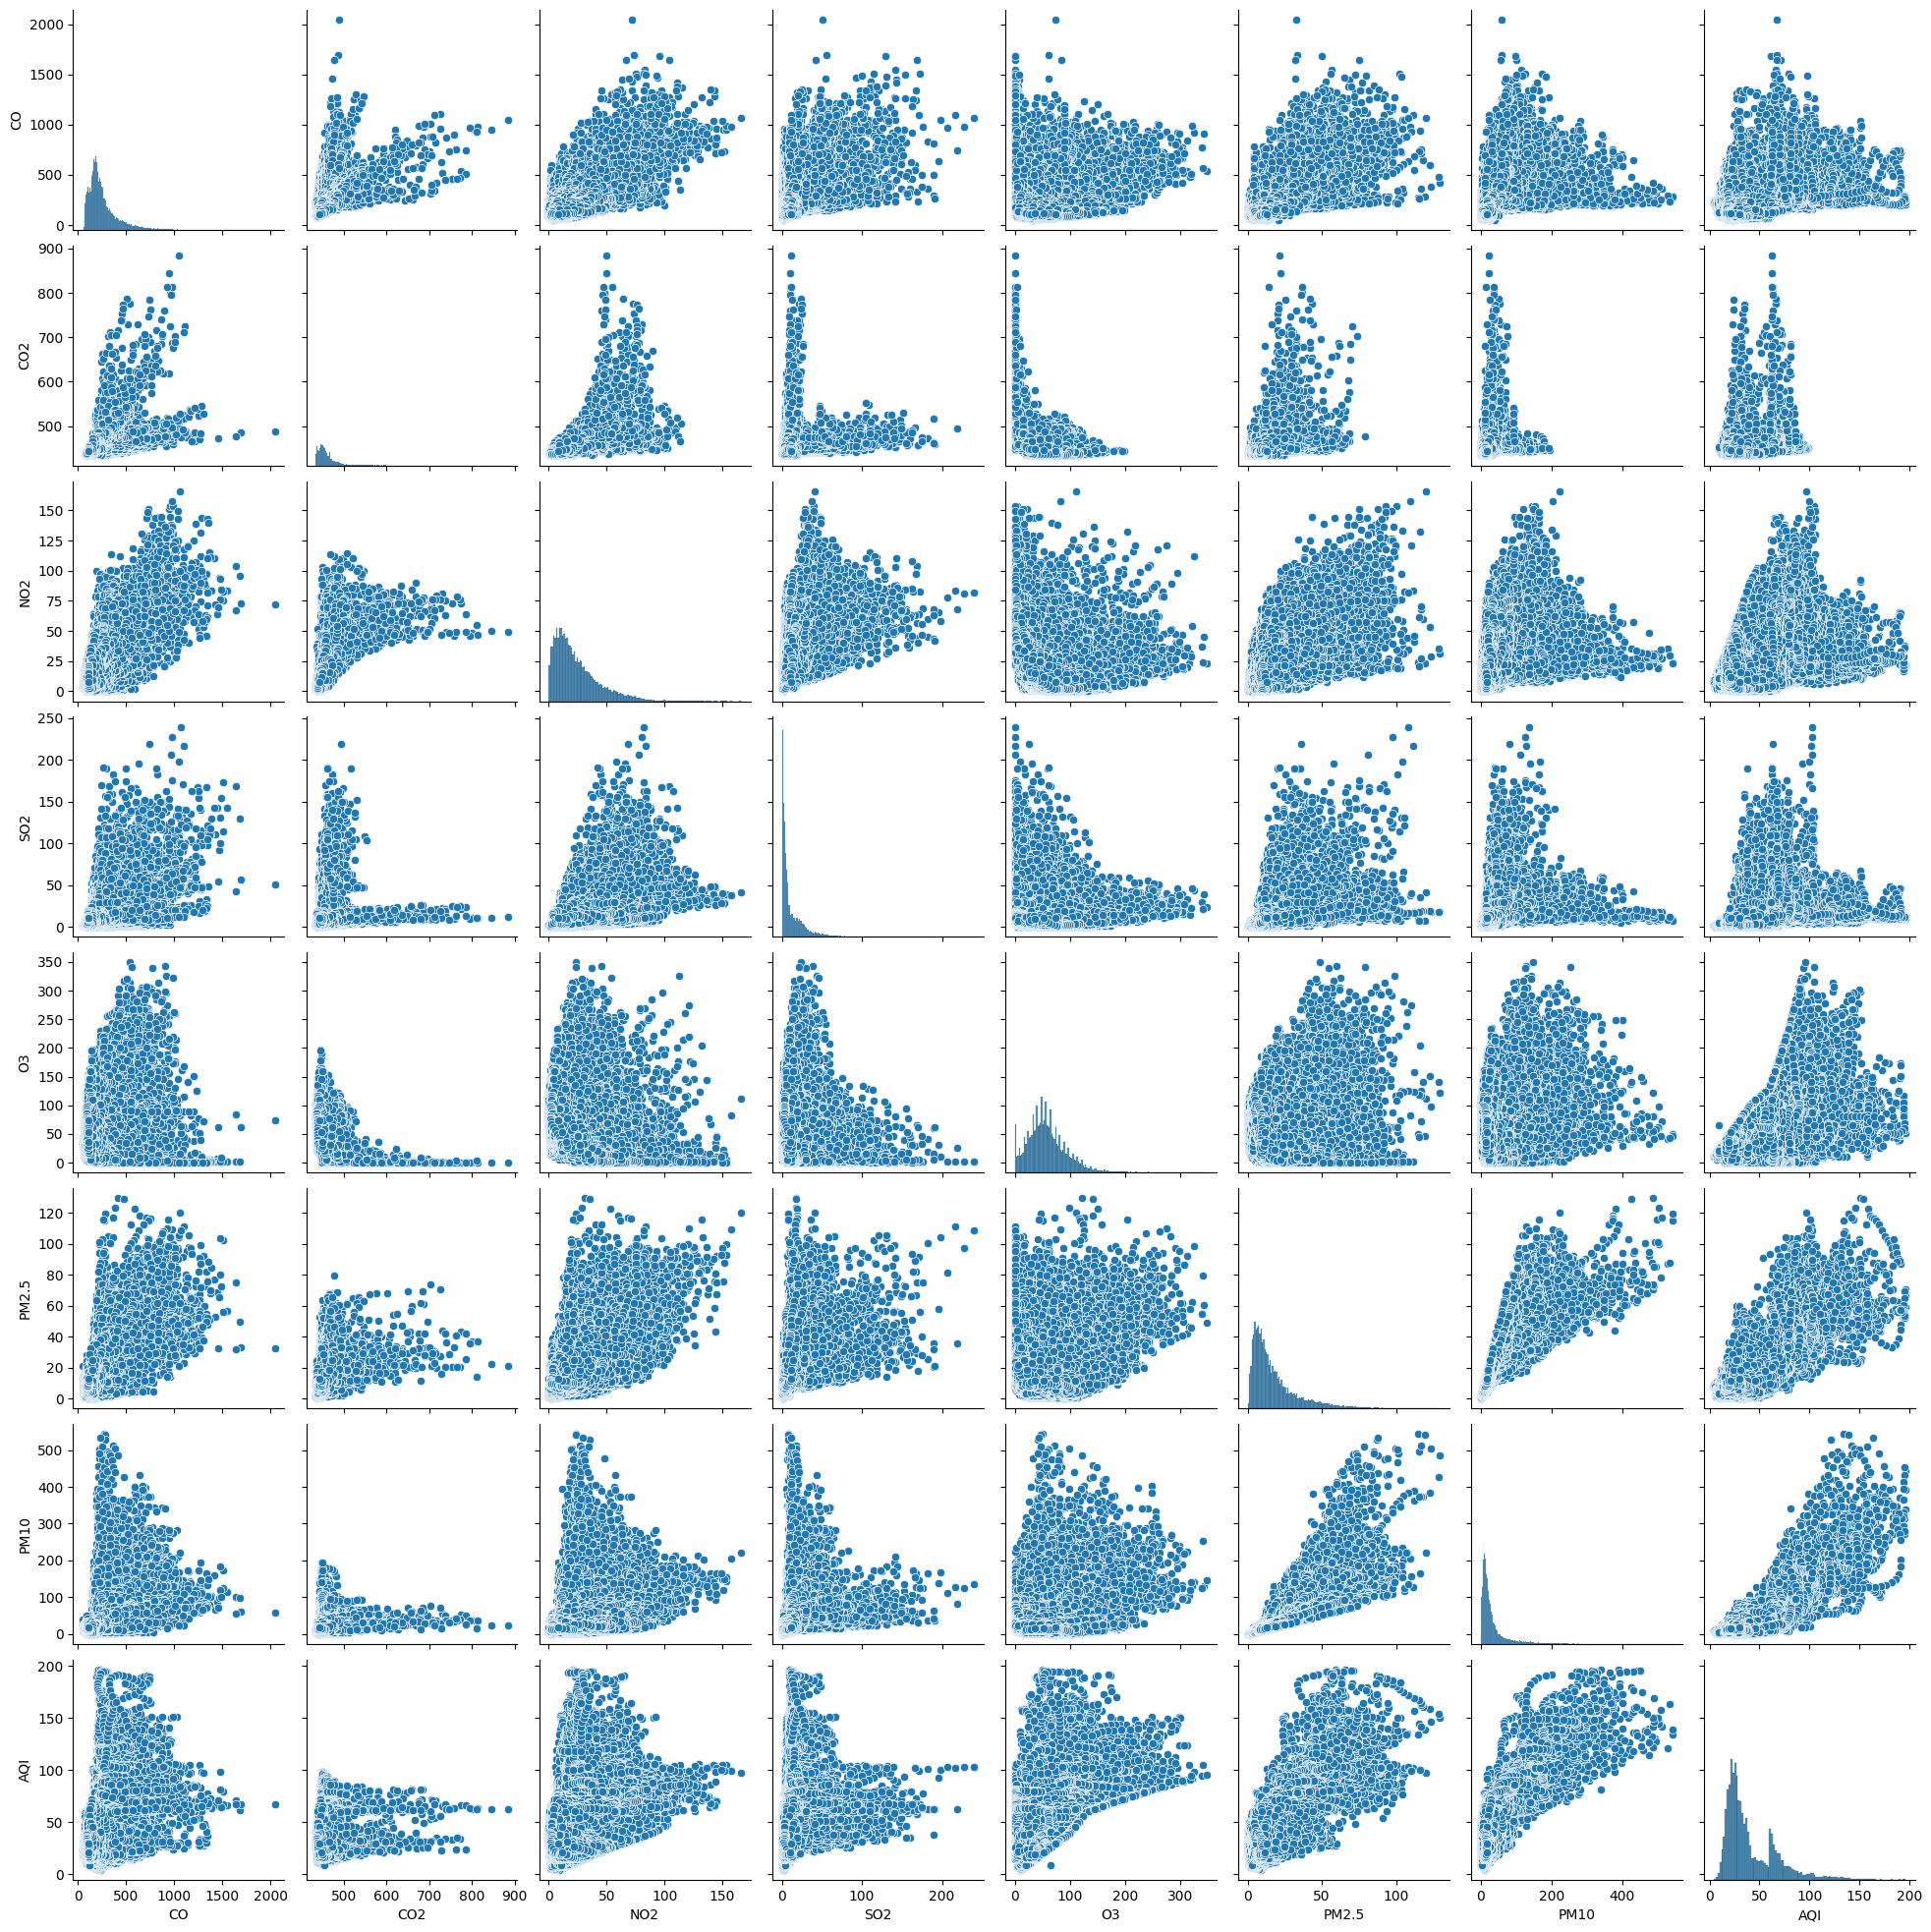

In [ ]:
sns.pairplot(df)
plt.show()

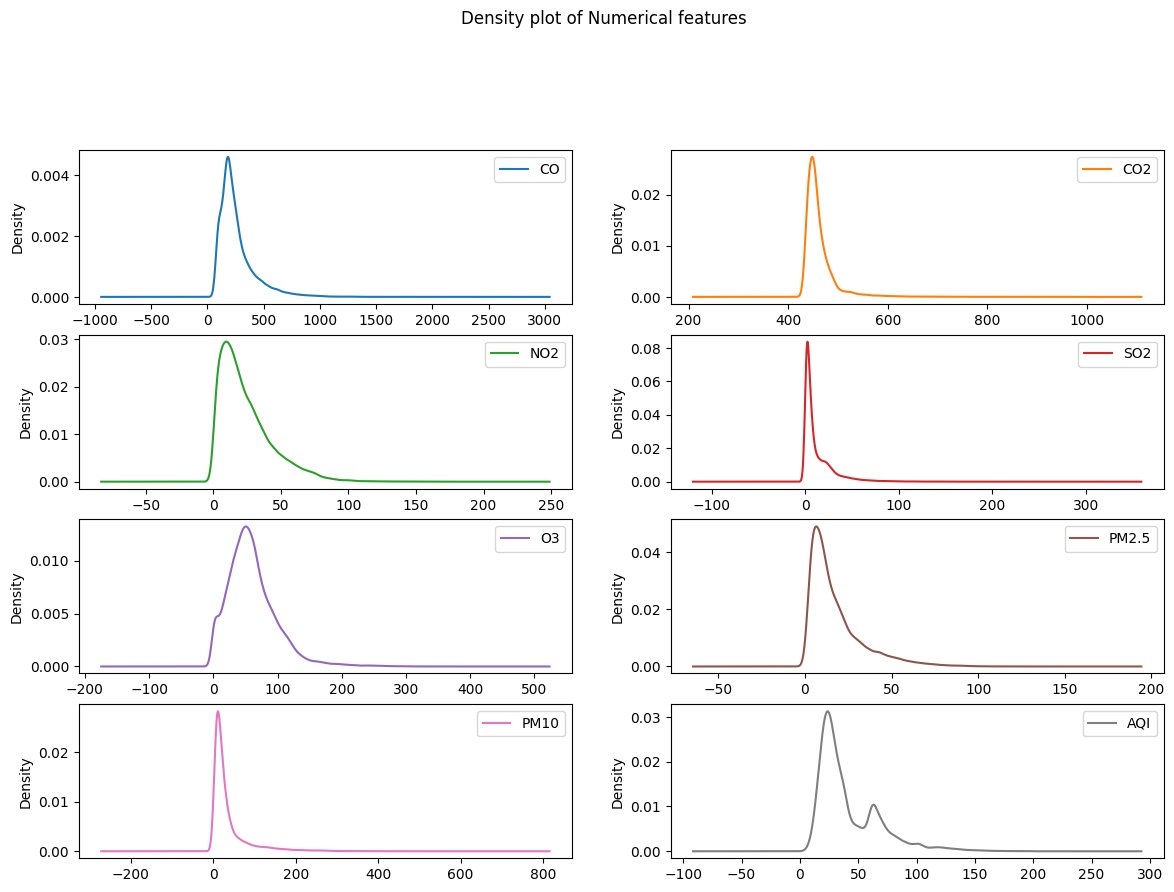

In [ ]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

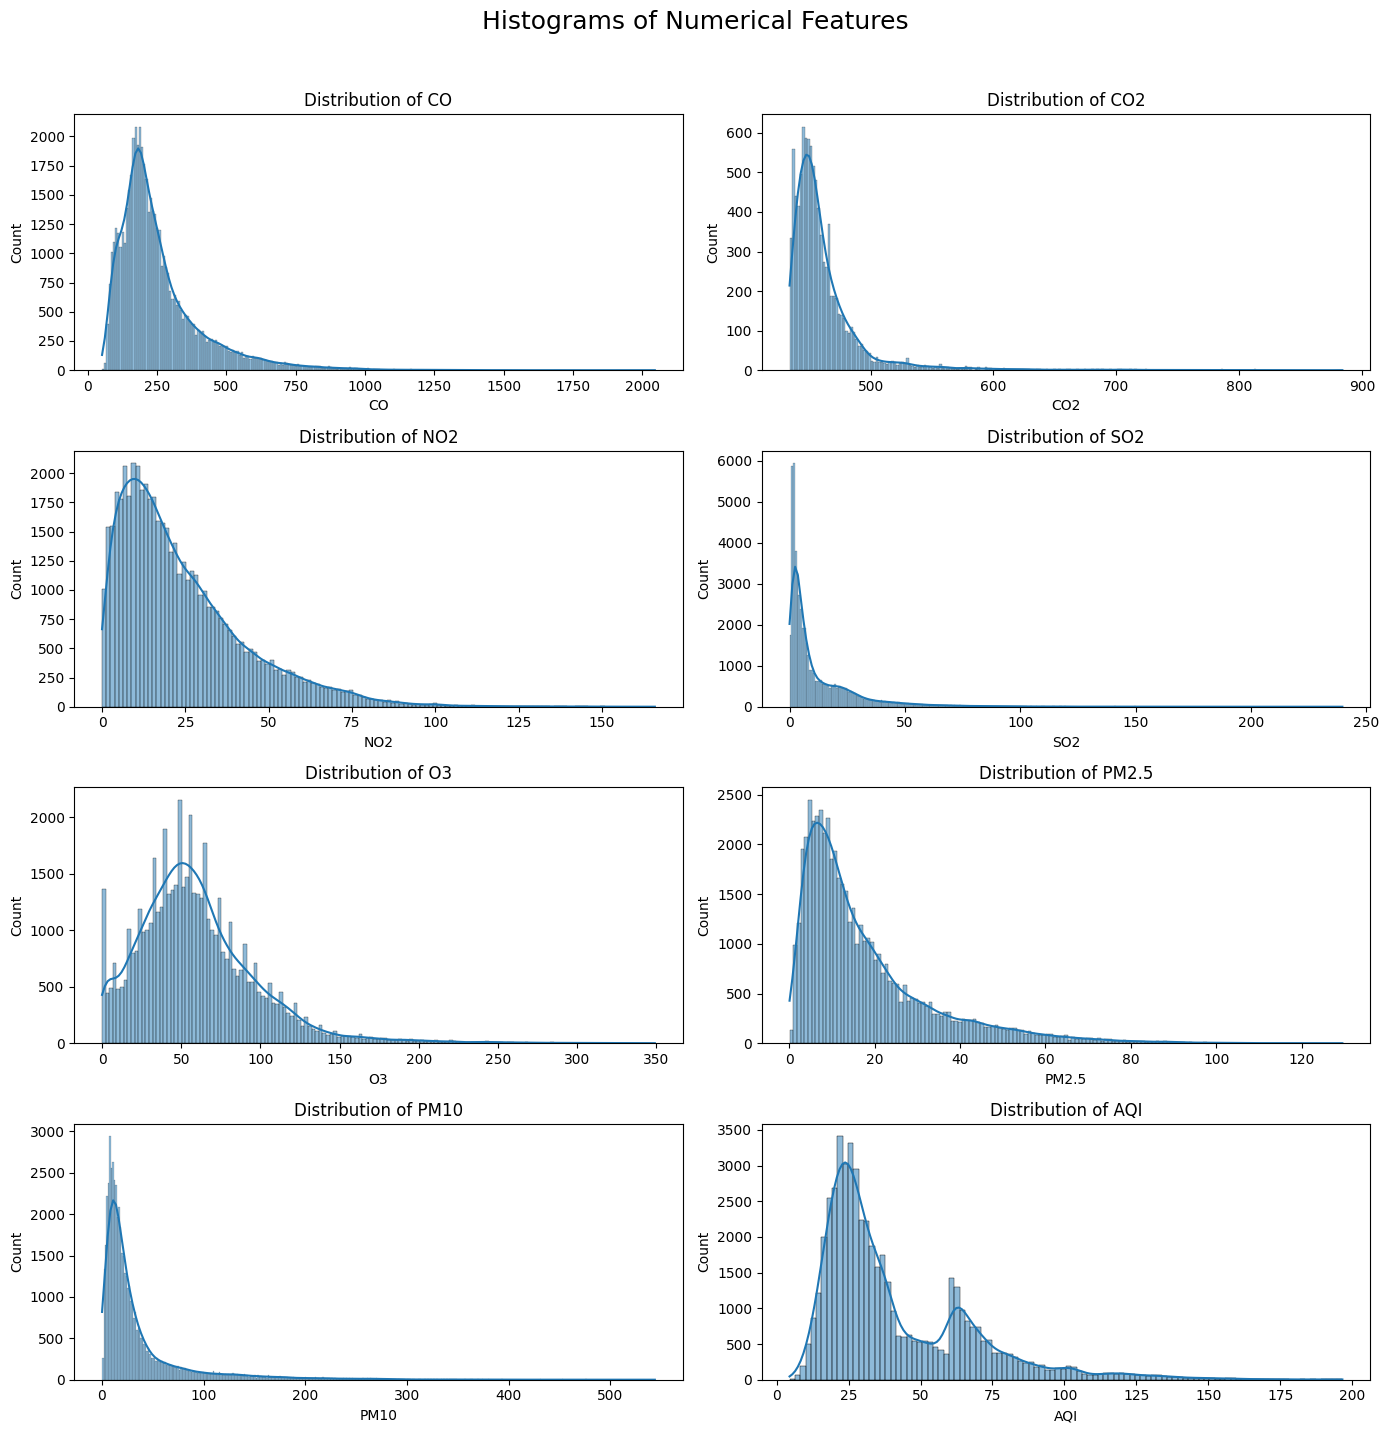

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, col in enumerate(numerical_data):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Numerical Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# **Correlation**

<Figure size 800x600 with 0 Axes>

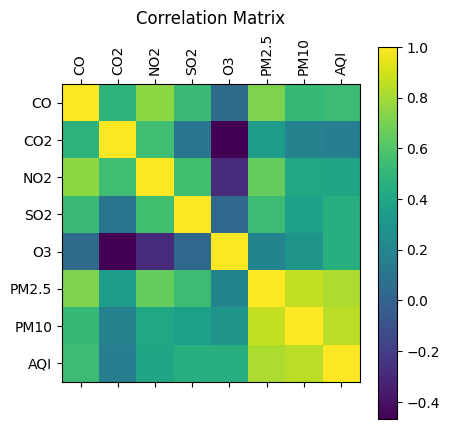

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# **Data Pre-processing**

In [ ]:
df = df.drop(['CO2', 'Date','City'], axis=1)
df.isnull().sum()
df = df.drop_duplicates()

## **Data Spliting**

In [ ]:
X = df.drop(['AQI'], axis=1) # features
y = df['AQI'] # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42163, 6)
X_test shape: (10541, 6)
y_train shape: (42163,)
y_test shape: (10541,)


## **Data Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Machine Learning models**

# *LinerRegression*

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"LinearRegression: MSE Score {mean_squared_error(y_test, lr_pred)}")
print(f"LinearRegression: RMSE Score {np.sqrt(mean_squared_error(y_test, lr_pred))}")
print(f"LinearRegression: R2 Score {r2_score(y_test, lr_pred)}")

LinearRegression: MSE Score 126.46934975953765
LinearRegression: RMSE Score 11.245859227268392
LinearRegression: R2 Score 0.8132824706681391


# *RandomForest*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"RandomForestRegressor: MSE Score {mean_squared_error(y_test, rf_pred)}")
print(f"RandomForestRegressor: RMSE Score {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"RandomForestRegressor: R2 Score {r2_score(y_test, rf_pred)}")

RandomForestRegressor: MSE Score 60.43691255344677
RandomForestRegressor: RMSE Score 7.774118120626079
RandomForestRegressor: R2 Score 0.9107718114003012


# *LassoRidge*

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(f"Lasso Regression: MSE: {mean_squared_error(y_test, lasso_pred)}")
print(f"Lasso Regression: RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred))}")
print(f"Lasso Regression: R2: {r2_score(y_test, lasso_pred)}")

Lasso Regression: MSE: 126.49051389767511
Lasso Regression: RMSE: 11.24680016260959
Lasso Regression: R2: 0.8132512242389373


# *ElasticNet*

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

print(f"ElasticNet Regression: MSE: {mean_squared_error(y_test, elastic_pred)}")
print(f"ElasticNet Regression: RMSE: {np.sqrt(mean_squared_error(y_test, elastic_pred))}")
print(f"ElasticNet Regression: R2: {r2_score(y_test, elastic_pred)}")

ElasticNet Regression: MSE: 126.481896076804
ElasticNet Regression: RMSE: 11.246417032851129
ElasticNet Regression: R2: 0.8132639474657455


# *SVR*

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print(f"Support Vector Regression (SVR): MSE: {mean_squared_error(y_test, svm_pred)}")
print(f"Support Vector Regression (SVR): RMSE: {np.sqrt(mean_squared_error(y_test, svm_pred))}")
print(f"Support Vector Regression (SVR): R2: {r2_score(y_test, svm_pred)}")

Support Vector Regression (SVR): MSE: 73.87373720724855
Support Vector Regression (SVR): RMSE: 8.594983258113336
Support Vector Regression (SVR): R2: 0.8909338767055028


# *GradientBoost*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

print(f"GradientBoosting: MSE: {mean_squared_error(y_test, gbr_pred)}")
print(f"GradientBoosting: RMSE: {np.sqrt(mean_squared_error(y_test, gbr_pred))}")
print(f"GradientBoosting: R2: {r2_score(y_test, gbr_pred)}")

GradientBoosting: MSE: 76.59673166885065
GradientBoosting: RMSE: 8.751955876765527
GradientBoosting: R2: 0.8869136868395678


# *KNN Regressor*

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(f"KNN Regressor: MSE: {mean_squared_error(y_test, knn_pred)}")
print(f"KNN Regressor: RMSE: {np.sqrt(mean_squared_error(y_test, knn_pred))}")
print(f"KNN Regressor: R2: {r2_score(y_test, knn_pred)}")

KNN Regressor: MSE: 61.54449093065821
KNN Regressor: RMSE: 7.84502969597045
KNN Regressor: R2: 0.9091365986113723


# **Neural Networks**

# *Multilayer Perceptron (1 layer, 64 neurons)*

In [ ]:
from sklearn.neural_network import MLPRegressor
nn1 = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', max_iter=1000, random_state=42)
nn1.fit(X_train, y_train)
nn1_pred = nn1.predict(X_test)

print(f"Neural Network (1 layer, 64 neurons): MSE: {mean_squared_error(y_test, nn1_pred)}")
print(f"Neural Network (1 layer, 64 neurons): RMSE: {np.sqrt(mean_squared_error(y_test, nn1_pred))}")
print(f"Neural Network (1 layer, 64 neurons): R2: {r2_score(y_test, nn1_pred)}")

Neural Network (1 layer, 64 neurons): MSE: 74.59142509362573
Neural Network (1 layer, 64 neurons): RMSE: 8.636632740462323
Neural Network (1 layer, 64 neurons): R2: 0.8898742926305429


# *MLP (3 layers, 128-64-32)*

In [ ]:
nn2 = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=1500, random_state=42)
nn2.fit(X_train, y_train)
nn2_pred = nn2.predict(X_test)

print(f"Neural Network (128-64-32): MSE: {mean_squared_error(y_test, nn2_pred)}")
print(f"Neural Network (128-64-32): RMSE: {np.sqrt(mean_squared_error(y_test, nn2_pred))}")
print(f"Neural Network (128-64-32): R2: {r2_score(y_test, nn2_pred)}")

Neural Network (128-64-32): MSE: 67.52108602188187
Neural Network (128-64-32): RMSE: 8.21712151680148
Neural Network (128-64-32): R2: 0.9003128395632551


# *Deep MLP (256-128-64-32)*

In [ ]:
# nn_deep = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), activation='relu',
#                        solver='adam', alpha=0.001, learning_rate_init=0.001,
#                        max_iter=2000, random_state=42)
# nn_deep.fit(X_train, y_train)
# nn_deep_pred = nn_deep.predict(X_test)

# print(f"Deep MLP (256-128-64-32): MSE: {mean_squared_error(y_test, nn_deep_pred)}")
# print(f"Deep MLP (256-128-64-32): RMSE: {np.sqrt(mean_squared_error(y_test, nn_deep_pred))}")
# print(f"Deep MLP (256-128-64-32): R2: {r2_score(y_test, nn_deep_pred)}")

# *MLP-Attention*

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

class AttentionMLP(nn.Module):
    def __init__(self, input_size):
        super(AttentionMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.attention = nn.Linear(128, 1)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        attn_weights = torch.softmax(self.attention(x), dim=1)
        x = x * attn_weights
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


model = AttentionMLP(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

dataset = TensorDataset(X_train_tensor, y_train_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for epoch in range(100):
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()


with torch.no_grad():
    attn_pred = model(X_test_tensor).squeeze().numpy()

print(f"Attention MLP: MSE: {mean_squared_error(y_test, attn_pred)}")
print(f"Attention MLP: RMSE: {np.sqrt(mean_squared_error(y_test, attn_pred))}")
print(f"Attention MLP: R2: {r2_score(y_test, attn_pred)}")

Attention MLP: MSE: 71.18892324033389
Attention MLP: RMSE: 8.437352857403434
Attention MLP: R2: 0.8948976974381241


# *PGNN*

In [ ]:
class PhysicsGuidedNN(nn.Module):
    def __init__(self, input_size):
        super(PhysicsGuidedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


def physics_loss(y_pred, y_true):
    mse = nn.MSELoss()(y_pred, y_true)
    penalty = torch.mean(torch.relu(-y_pred)) + torch.mean(torch.relu(y_pred - 500))
    return mse + 0.1 * penalty

model_pg = PhysicsGuidedNN(input_size=X_train.shape[1])
optimizer = optim.Adam(model_pg.parameters(), lr=0.001)

for epoch in range(100):
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        output = model_pg(batch_x)
        loss = physics_loss(output, batch_y)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    pg_pred = model_pg(X_test_tensor).squeeze().numpy()

print(f"Physics-Guided NN: MSE: {mean_squared_error(y_test, pg_pred)}")
print(f"Physics-Guided NN: RMSE: {np.sqrt(mean_squared_error(y_test, pg_pred))}")
print(f"Physics-Guided NN: R2: {r2_score(y_test, pg_pred)}")

Physics-Guided NN: MSE: 70.47499394045718
Physics-Guided NN: RMSE: 8.394938590630499
Physics-Guided NN: R2: 0.8959517323900239


# *CNN-MLP Hybrid*

In [ ]:
class CNNMLP(nn.Module):
    def __init__(self, input_size):
        super(CNNMLP, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)


        conv_output_size = 32 * (input_size // 2)

        self.fc1 = nn.Linear(conv_output_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)


def train_cnn_mlp_model(X_train, y_train, X_test, y_test, batch_size=32, num_epochs=100):

    train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


    model_cnn = CNNMLP(input_size=X_train.shape[1])
    optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)
    criterion = nn.MSELoss()


    model_cnn.train()
    for epoch in range(num_epochs):
        for batch_x, batch_y in loader:
            optimizer.zero_grad()
            output = model_cnn(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()


    model_cnn.eval()
    X_test_tensor = torch.FloatTensor(X_test)
    with torch.no_grad():
        cnn_pred = model_cnn(X_test_tensor).squeeze().numpy()

    print(f"CNN-MLP: MSE: {mean_squared_error(y_test, cnn_pred):.4f}")
    print(f"CNN-MLP: RMSE: {np.sqrt(mean_squared_error(y_test, cnn_pred)):.4f}")
    print(f"CNN-MLP: R2: {r2_score(y_test, cnn_pred):.4f}")

    return model_cnn, cnn_pred


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


model_cnn = CNNMLP(input_size=X_train.shape[1])
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)
criterion = nn.MSELoss()


print("Training CNN-MLP Model...")
model_cnn.train()
for epoch in range(100):
    epoch_loss = 0.0
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        output = model_cnn(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {epoch_loss/len(loader):.4f}')


model_cnn.eval()
with torch.no_grad():
    cnn_pred = model_cnn(X_test_tensor).squeeze().numpy()


print(f"\nCNN-MLP Results:")
print(f"MSE: {mean_squared_error(y_test, cnn_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, cnn_pred)):.4f}")
print(f"R2: {r2_score(y_test, cnn_pred):.4f}")

Training CNN-MLP Model...
Epoch [20/100], Loss: 88.7897
Epoch [40/100], Loss: 86.6820
Epoch [60/100], Loss: 84.8545
Epoch [80/100], Loss: 84.2047
Epoch [100/100], Loss: 83.2701

CNN-MLP Results:
MSE: 75.9313
RMSE: 8.7139
R2: 0.8879


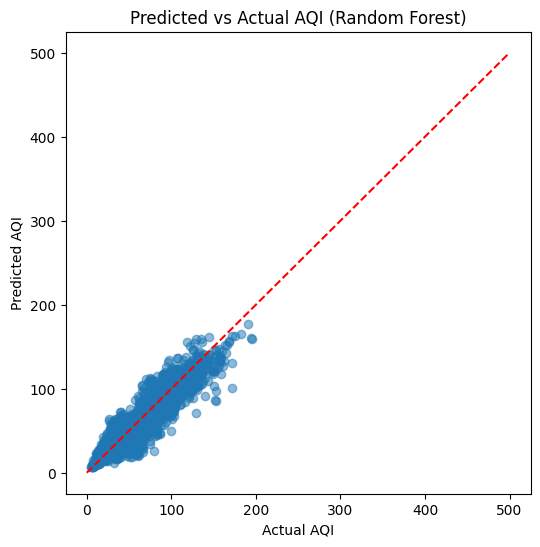

In [ ]:
y_pred = rf.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0,500], [0,500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI (Random Forest)")
plt.show()

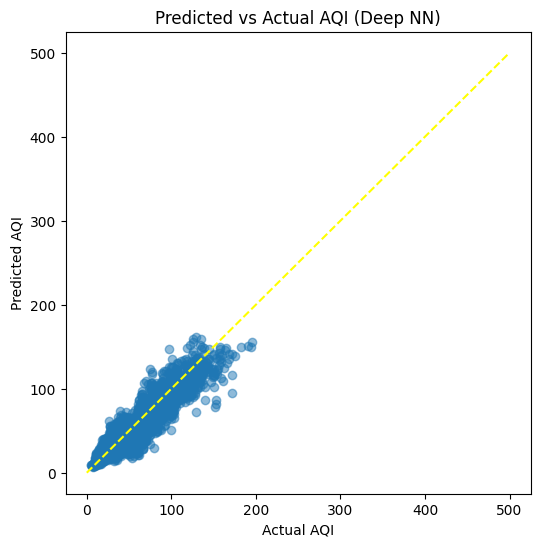

In [ ]:
y_pred = nn_deep.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0,500], [0,500], color='yellow', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI (Deep NN)")
plt.show()
